In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
import os

img_dir = '/Users/Janek/Moje rzeczy/Koźmiński/Drugi rok/Python ćwiczenia/train'
images = os.listdir(img_dir)

In [5]:
full_images = [os.path.join(img_dir, img) for img in images]

In [77]:
from imports_for_ML import load_images

X, y = load_images(img_dir, n_images=16000, resize=(64, 64))

**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************
**************************************************


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

stop_early = EarlyStopping(patience=5)

In [81]:
from tensorflow.keras.layers import Dropout, BatchNormalization

In [136]:
model = Sequential([
    
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),    
    
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    BatchNormalization(),
    
    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    
    Conv2D(256, (3,3), activation='relu'),
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    
    Flatten(input_shape=(5,5,32)),
    Dense(512, activation='relu'),
    
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [137]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.04, callbacks=[stop_early])

Epoch 1/25
432/432 [==============================] - 141s 324ms/step - loss: 1.7364 - accuracy: 0.5433 - val_loss: 0.6537 - val_accuracy: 0.6042
Epoch 2/25
432/432 [==============================] - 126s 292ms/step - loss: 0.6543 - accuracy: 0.6457 - val_loss: 0.6291 - val_accuracy: 0.6406
Epoch 3/25
432/432 [==============================] - 126s 291ms/step - loss: 0.5782 - accuracy: 0.7017 - val_loss: 0.8161 - val_accuracy: 0.5451
Epoch 4/25
432/432 [==============================] - 126s 292ms/step - loss: 0.5276 - accuracy: 0.7446 - val_loss: 0.6817 - val_accuracy: 0.6597
Epoch 5/25
432/432 [==============================] - 121s 279ms/step - loss: 0.4711 - accuracy: 0.7822 - val_loss: 0.5040 - val_accuracy: 0.7378
Epoch 6/25
432/432 [==============================] - 133s 308ms/step - loss: 0.4083 - accuracy: 0.8168 - val_loss: 0.8196 - val_accuracy: 0.7031
Epoch 7/25
432/432 [==============================] - 3155s 7s/step - loss: 0.3745 - accuracy: 0.8432 - val_loss: 0.4305 - v

In [138]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (32, 62, 62, 32)          896       
_________________________________________________________________
conv2d_55 (Conv2D)           (32, 60, 60, 32)          9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (32, 30, 30, 32)          0         
_________________________________________________________________
batch_normalization_27 (Batc (32, 30, 30, 32)          128       
_________________________________________________________________
conv2d_56 (Conv2D)           (32, 28, 28, 64)          18496     
_________________________________________________________________
conv2d_57 (Conv2D)           (32, 26, 26, 64)          36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (32, 13, 13, 64)         

In [139]:
length = range(0,len(history.history['loss']))

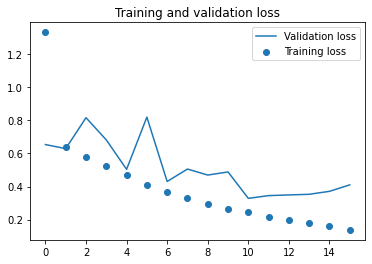

In [140]:
plt.scatter(y=history.history['loss'],x=length, label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Training and validation loss")
plt.legend()

Accuracy on the training data:
450/450 [==============================] - 25s 56ms/step - loss: 0.2246 - accuracy: 0.9179
0.9179166555404663

Accuracy on the test data:
50/50 [==============================] - 3s 57ms/step - loss: 0.5219 - accuracy: 0.8537
0.8537499904632568


Text(0, 0.5, 'Accuracy')

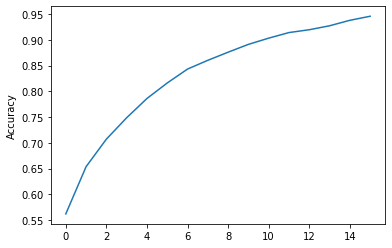

In [141]:
print('Accuracy on the training data:')
print(model.evaluate(X_train, y_train)[1])

print('\nAccuracy on the test data:')
print(model.evaluate(X_test, y_test)[1])

plt.plot(history.history['accuracy'])
plt.ylabel('Accuracy')

In [142]:
test_sample = X_test[:200]
predictions = model.predict(test_sample)
true_labels = y_test[:200]

In [143]:
net_claim = predictions[:, 0]

In [144]:
net_claim

array([4.08229232e-03, 1.77647173e-02, 9.76294279e-03, 9.98812020e-01,
       7.35428393e-01, 9.90868270e-01, 9.03690338e-01, 1.00000000e+00,
       1.99501628e-05, 7.89644982e-05, 2.51226187e-01, 3.69805098e-03,
       1.00000000e+00, 9.17380810e-01, 9.68000770e-01, 3.67909372e-02,
       7.05957413e-04, 7.98207283e-01, 9.99994814e-01, 6.89122677e-02,
       9.99998689e-01, 9.99995947e-01, 9.70965862e-01, 9.99067605e-01,
       8.46570253e-01, 2.18550026e-01, 9.25724626e-01, 7.33050883e-01,
       5.94163930e-06, 6.87362552e-01, 4.77811694e-03, 4.47839499e-04,
       4.46857031e-11, 9.99999404e-01, 1.04876607e-09, 6.65182948e-01,
       9.99994278e-01, 9.97607350e-01, 9.99998331e-01, 1.00000000e+00,
       8.76838749e-06, 9.99541104e-01, 9.99449611e-01, 9.99945343e-01,
       9.71821964e-01, 1.22074191e-08, 7.36089587e-01, 9.87608075e-01,
       1.00000000e+00, 9.27615047e-01, 1.13989413e-02, 5.08586228e-01,
       9.42953110e-01, 6.18287777e-06, 9.69596744e-01, 6.46575689e-02,
      

In [145]:
correct_response1 = true_labels

In [146]:
net_correct = np.where(np.abs(net_claim - correct_response1) < 0.5)

In [147]:
net_correct

(array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  26,  28,
         29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,
         43,  45,  46,  47,  48,  49,  50,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  63,  64,  65,  66,  67,  68,  69,  70,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  82,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 100, 101,
        102, 104, 105, 106, 107, 108, 110, 112, 113, 114, 116, 117, 118,
        119, 120, 121, 122, 124, 126, 127, 129, 130, 131, 132, 133, 134,
        137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150,
        151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 164, 165, 166,
        167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 197, 198, 199]),)

In [148]:
net_false = np.where(np.abs(net_claim - correct_response1) > 0.5)

In [149]:
net_false

(array([  4,  19,  27,  35,  44,  51,  62,  71,  81,  83,  99, 103, 109,
        111, 115, 123, 125, 128, 135, 136, 148, 152, 162, 163, 170, 196]),)

In [150]:
net_correct

(array([  0,   1,   2,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  26,  28,
         29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  40,  41,  42,
         43,  45,  46,  47,  48,  49,  50,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  63,  64,  65,  66,  67,  68,  69,  70,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  82,  84,  85,  86,  87,
         88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 100, 101,
        102, 104, 105, 106, 107, 108, 110, 112, 113, 114, 116, 117, 118,
        119, 120, 121, 122, 124, 126, 127, 129, 130, 131, 132, 133, 134,
        137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150,
        151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 164, 165, 166,
        167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 197, 198, 199]),)

In [151]:
import random

random_net_correct = random.sample(list(net_correct[0]), 6)
random_net_false = random.sample(list(net_false[0]), 6)

In [152]:
random_net_correct

[91, 31, 145, 38, 127, 96]

In [153]:
random_net_false

[128, 62, 35, 111, 51, 44]

(-0.5, 63.5, 63.5, -0.5)

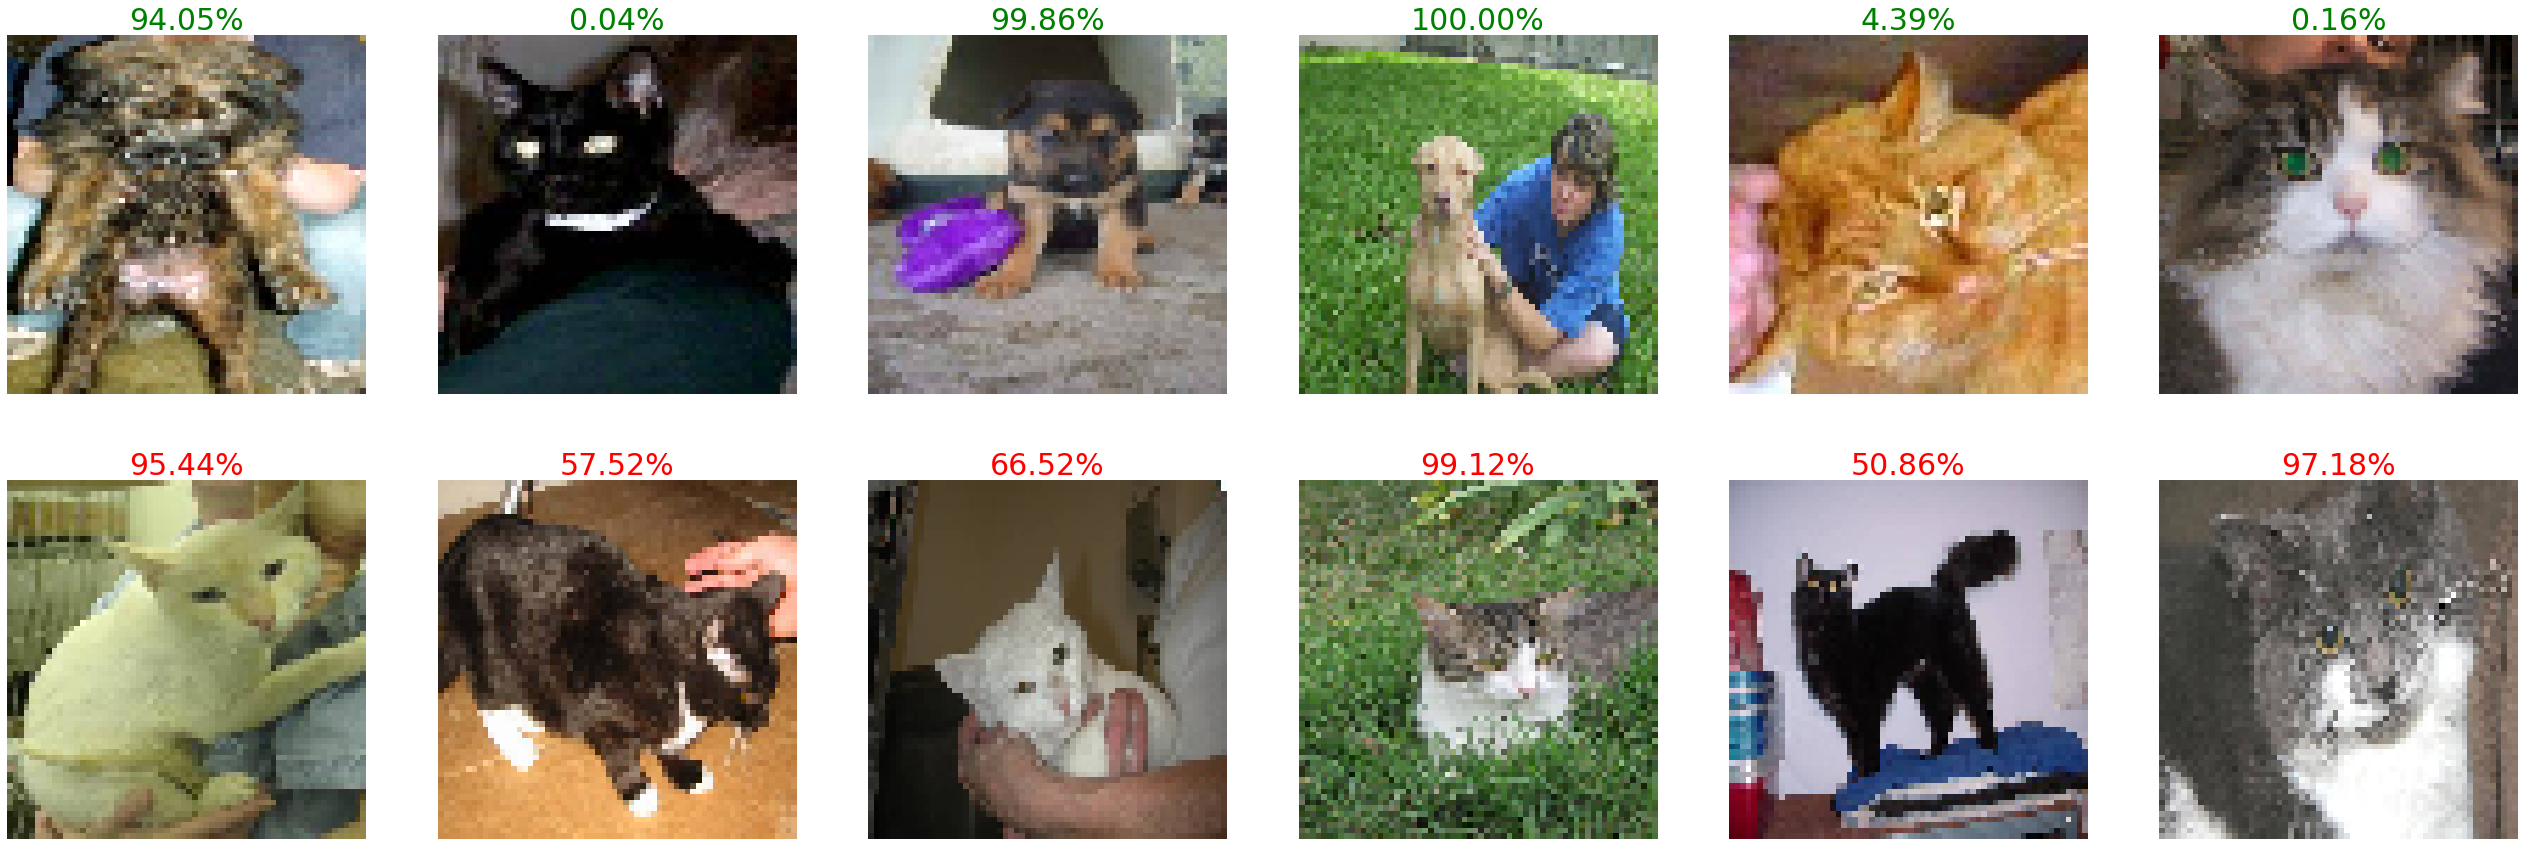

In [165]:
fig, ax = plt.subplots (ncols=6, nrows=2, figsize=(45, 15))
text ='{:.2f}%'
ax[0][0].axis('off')


ax[0][0].imshow(X=X_test[random_net_correct[0]] / 255)
ax[0][0].set_title(text.format(net_claim[random_net_correct[0]] * 100), fontsize=30, color="green")
ax[0][0].axis('off')

ax[0][1].imshow(X=X_test[random_net_correct[1]] / 255)
ax[0][1].set_title(text.format(net_claim[random_net_correct[1]] * 100), fontsize=30, color="green")
ax[0][1].axis('off')

ax[0][2].imshow(X=X_test[random_net_correct[2]] / 255)
ax[0][2].set_title(text.format(net_claim[random_net_correct[2]] * 100), fontsize=30, color="green")
ax[0][2].axis('off')

ax[0][3].imshow(X=X_test[random_net_correct[3]] / 255)
ax[0][3].set_title(text.format(net_claim[random_net_correct[3]] * 100), fontsize=30, color="green")
ax[0][3].axis('off')

ax[0][4].imshow(X=X_test[random_net_correct[4]] / 255)
ax[0][4].set_title(text.format(net_claim[random_net_correct[4]] * 100), fontsize=30, color="green")
ax[0][4].axis('off')

ax[0][5].imshow(X=X_test[random_net_correct[5]] / 255)
ax[0][5].set_title(text.format(net_claim[random_net_correct[5]] * 100), fontsize=30, color="green")
ax[0][5].axis('off')




ax[1][0].imshow(X=X_test[random_net_false[0]] / 255)
ax[1][0].set_title(text.format(net_claim[random_net_false[0]] * 100), fontsize=30, color="red")
ax[1][0].axis('off')

ax[1][1].imshow(X=X_test[random_net_false[1]] / 255)
ax[1][1].set_title(text.format(net_claim[random_net_false[1]] * 100), fontsize=30, color="red")
ax[1][1].axis('off')

ax[1][2].imshow(X=X_test[random_net_false[2]] / 255)
ax[1][2].set_title(text.format(net_claim[random_net_false[2]] * 100), fontsize=30, color="red")
ax[1][2].axis('off')

ax[1][3].imshow(X=X_test[random_net_false[3]] / 255)
ax[1][3].set_title(text.format(net_claim[random_net_false[3]] * 100), fontsize=30, color="red")
ax[1][3].axis('off')

ax[1][4].imshow(X=X_test[random_net_false[4]] / 255)
ax[1][4].set_title(text.format(net_claim[random_net_false[4]] * 100), fontsize=30, color="red")
ax[1][4].axis('off')

ax[1][5].imshow(X=X_test[random_net_false[5]] / 255)
ax[1][5].set_title(text.format(net_claim[random_net_false[5]] * 100), fontsize=30, color="red")
ax[1][5].axis('off')

In [155]:
my_dog_dir = "/Users/Janek/Moje rzeczy/Koźmiński/Drugi rok/Python ćwiczenia/dog/13.jpg"

In [156]:
img_dog = plt.imread(my_dog_dir)

(-0.5, 3647.5, 2735.5, -0.5)

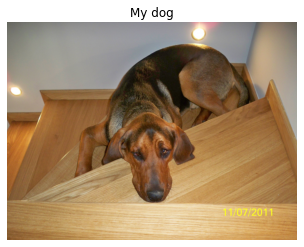

In [157]:
plt.imshow(X=img_dog)
plt.title("My dog")
plt.axis('off')

In [158]:
import keras
dog = keras.preprocessing.image.load_img(my_dog_dir, target_size=(64, 64))
dog_array = keras.preprocessing.image.img_to_array(dog)
dog_array = tensorflow.expand_dims(dog_array, 0)

dog_prediction = model.predict(dog_array)

(-0.5, 63.5, 63.5, -0.5)

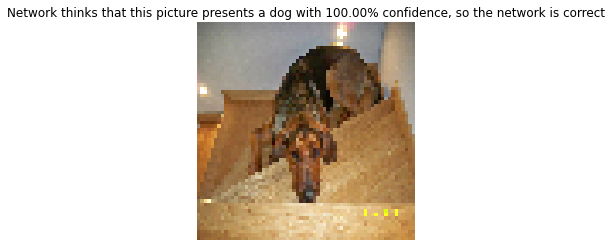

In [164]:
prediction_text = dog_prediction[0,0] * 100


plt.imshow(X=dog)
plt.title(f'Network thinks that this picture presents a dog with {"%.2f" % prediction_text}% confidence, so the network is correct')
plt.axis('off')

In [163]:
tensorflow.keras.models.save_model(model=model, filepath="/Users/Janek/Moje rzeczy/Koźmiński/Drugi rok/Python ćwiczenia/Jan_Galiński_40867_MODEL.h5")